In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [3]:
plt.style.use('ggplot')

# 기본 데이터 불러오기

In [4]:
oil_df = pd.read_csv('./data/oil.csv') # 결측치 처리 해줘야함. 1차 train_df 매핑 끝, 결측값 처리 후 2차 매핑 -->>> EDA 후
stores_df = pd.read_csv('./data/stores.csv') # 끝
transactions_df = pd.read_csv('./data/transactions.csv')
holiday_df = pd.read_csv('./data/holidays_events.csv')
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

# 1. 간단히 데이터 탐색

In [5]:
oil_df

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [6]:
len(transactions_df)

83488

In [7]:
transactions_df.drop_duplicates(['date', 'store_nbr'])

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922
...,...,...,...
83483,2017-08-15,50,2804
83484,2017-08-15,51,1573
83485,2017-08-15,52,2255
83486,2017-08-15,53,932


In [8]:
holiday_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [9]:
train_df

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


# 1) stores 데이터의 store_nbr은 유니크값, test df에 매핑 가능

In [10]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [11]:
stores_df.set_index('store_nbr', inplace=True)

In [12]:
stores_df

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4
6,Quito,Pichincha,D,13
7,Quito,Pichincha,D,8
8,Quito,Pichincha,D,8
9,Quito,Pichincha,B,6


In [13]:
stores_df.columns

Index(['city', 'state', 'type', 'cluster'], dtype='object')

In [14]:
train_df[stores_df.columns] = 0

In [15]:
for col in stores_df.columns:
    train_df[col] = train_df['store_nbr'].map(stores_df[col])

In [16]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


# 2) oil의 일자별 가격은 train 데이터 date와 매핑 가능

In [17]:
oil_df.columns

Index(['date', 'dcoilwtico'], dtype='object')

In [18]:
type(train_df['date'][0]), type(oil_df['dcoilwtico'][0])

(str, numpy.float64)

In [19]:
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].astype(str)

In [20]:
oil_df.set_index('date', inplace=True)

In [21]:
train_df['dcoilwtico'] = train_df['date'].map(oil_df['dcoilwtico'])

In [22]:
train_df[~train_df['dcoilwtico'].isna()]

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,nan
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,nan
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,nan
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,nan
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,nan
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


# 3) transactions 데이터 탐색

In [23]:
transactions_df.reset_index(inplace=True)

In [24]:
transactions_df

,index,date,store_nbr,transactions
0,0,2013-01-01,25,770
1,1,2013-01-02,1,2111
2,2,2013-01-02,2,2358
3,3,2013-01-02,3,3487
4,4,2013-01-02,4,1922
...,...,...,...,...
83483,83483,2017-08-15,50,2804
83484,83484,2017-08-15,51,1573
83485,83485,2017-08-15,52,2255
83486,83486,2017-08-15,53,932


In [25]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,nan
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,nan
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,nan
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,nan
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,nan
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [26]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type         object 
 9   cluster      int64  
 10  dcoilwtico   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 251.8+ MB


In [27]:
transactions_df

,index,date,store_nbr,transactions
0,0,2013-01-01,25,770
1,1,2013-01-02,1,2111
2,2,2013-01-02,2,2358
3,3,2013-01-02,3,3487
4,4,2013-01-02,4,1922
...,...,...,...,...
83483,83483,2017-08-15,50,2804
83484,83484,2017-08-15,51,1573
83485,83485,2017-08-15,52,2255
83486,83486,2017-08-15,53,932


In [28]:
oil_df.columns

Index(['dcoilwtico'], dtype='object')

In [29]:
oil_df['dcoilwtico'] = oil_df['dcoilwtico'].astype(float)

In [30]:
oil_df

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20
...,...
2017-08-25,47.65
2017-08-28,46.40
2017-08-29,46.46


<AxesSubplot:xlabel='date'>

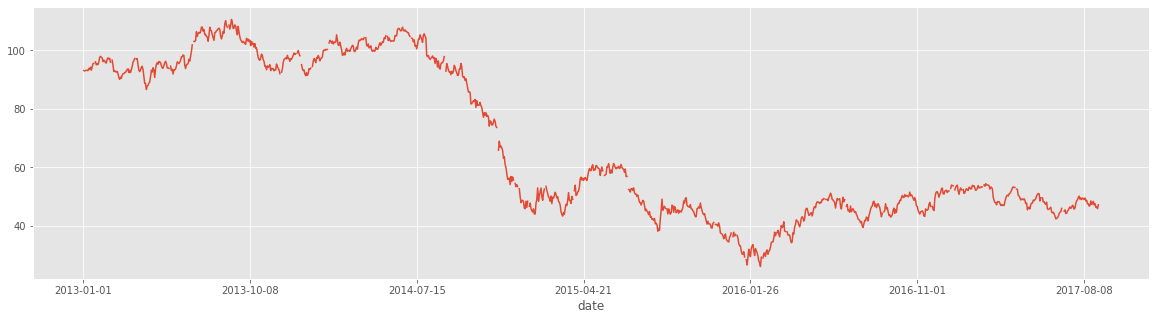

In [31]:
oil_df['dcoilwtico'].plot(figsize=(20,5))

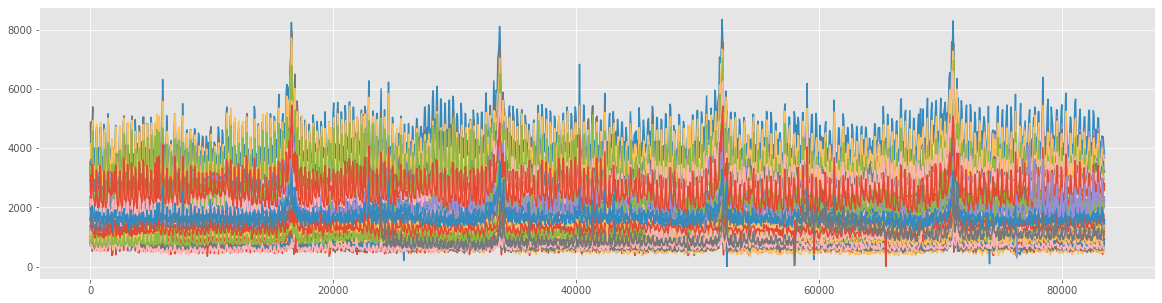

In [32]:
plt.figure(figsize=(20,5))
for store in range(1, len(set(transactions_df['store_nbr']))):
    plt.plot(transactions_df[transactions_df['store_nbr'] == store]['transactions'])
plt.show()

asdsadasdfasdfsadfasdfasf

In [33]:
len(transactions_df)

83488

In [34]:
len(transactions_df.drop_duplicates('date'))

1682

In [35]:
transactions_df

,index,date,store_nbr,transactions
0,0,2013-01-01,25,770
1,1,2013-01-02,1,2111
2,2,2013-01-02,2,2358
3,3,2013-01-02,3,3487
4,4,2013-01-02,4,1922
...,...,...,...,...
83483,83483,2017-08-15,50,2804
83484,83484,2017-08-15,51,1573
83485,83485,2017-08-15,52,2255
83486,83486,2017-08-15,53,932


In [36]:
tmp = transactions_df.groupby(['date', 'store_nbr']).count().reset_index()
tmp[tmp['transactions'] != 1]

,date,store_nbr,index,transactions


# 2. 전처리 때려박기

In [37]:
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13,nan
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13,nan
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13,nan
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13,nan
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13,nan
...,...,...,...,...,...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6,47.57
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6,47.57
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6,47.57
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6,47.57


In [38]:
len(set(train_df['family']))

33

일자별 오일 가격과 상점 매출 상관관계..

# 전처리 때려박기

## train.csv

In [39]:
df_train = pd.read_csv('./data/train.csv')

In [40]:
df_train['date'] = pd.to_datetime(df_train['date'])

In [41]:
df_train['date'] = df_train['date'].dt.to_period('D')

In [42]:
df_train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


In [43]:
store_sales = df_train.set_index(['store_nbr', 'family', 'date']).sort_index()

In [44]:
prom = (store_sales.groupby('date').mean().squeeze())['onpromotion'].to_frame()

In [45]:
prom

,onpromotion
date,
2013-01-01,0.000000
2013-01-02,0.000000
2013-01-03,0.000000
2013-01-04,0.000000
2013-01-05,0.000000
...,...
2017-08-11,7.956790
2017-08-12,4.664422
2017-08-13,5.209315


In [46]:
average_sales = (store_sales.groupby('date').mean().squeeze())['sales'].to_frame()

In [47]:
average_sales

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [48]:
store_sales

id  sales  onpromotion
store_nbr family     date                                   
1         AUTOMOTIVE 2013-01-01        0    0.0            0
                     2013-01-02     1782    2.0            0
                     2013-01-03     3564    3.0            0
                     2013-01-04     5346    3.0            0
                     2013-01-05     7128    5.0            0
...                                  ...    ...          ...
54        SEAFOOD    2017-08-11  2993627    0.0            0
                     2017-08-12  2995409    1.0            1
                     2017-08-13  2997191    2.0            0
                     2017-08-14  2998973    0.0            0
                     2017-08-15  3000755    3.0            0

[3000888 rows x 3 columns]

In [49]:
df_train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


## test.csv

In [50]:
df_test = pd.read_csv('./data/test.csv', parse_dates=['date'])
df_test['date'] = df_test['date'].dt.to_period('D')
df_test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


## stores.csv

In [51]:
stores = pd.read_csv('./data/stores.csv', index_col=['store_nbr'])
stores_df.head()

,city,state,type,cluster
store_nbr,,,,
1,Quito,Pichincha,D,13
2,Quito,Pichincha,D,13
3,Quito,Pichincha,D,8
4,Quito,Pichincha,D,9
5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


## oil.csv

In [52]:
oil = pd.read_csv('./data/oil.csv', parse_dates=['date'])
oil = oil.set_index('date').to_period('D')
oil.head()

,dcoilwtico
date,
2013-01-01,NaN
2013-01-02,93.14
2013-01-03,92.97
2013-01-04,93.12
2013-01-07,93.20


In [53]:
holiday_df

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


## holidays_events.csv

In [54]:
holiday = pd.read_csv('./data/holidays_events.csv', parse_dates=['date'])
holiday = holiday.set_index('date').to_period('D')
holiday.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


## transactions.csv

In [55]:
transactions_df

,index,date,store_nbr,transactions
0,0,2013-01-01,25,770
1,1,2013-01-02,1,2111
2,2,2013-01-02,2,2358
3,3,2013-01-02,3,3487
4,4,2013-01-02,4,1922
...,...,...,...,...
83483,83483,2017-08-15,50,2804
83484,83484,2017-08-15,51,1573
83485,83485,2017-08-15,52,2255
83486,83486,2017-08-15,53,932


In [56]:
transactions = pd.read_csv('./data/transactions.csv', parse_dates=['date'])
transactions = transactions.set_index('date').to_period('D')
transactions.head()

,store_nbr,transactions
date,,
2013-01-01,25,770
2013-01-02,1,2111
2013-01-02,2,2358
2013-01-02,3,3487
2013-01-02,4,1922


# 시각화

## 1. date

In [57]:
sales_plot = average_sales.copy()

In [58]:
sales_plot

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


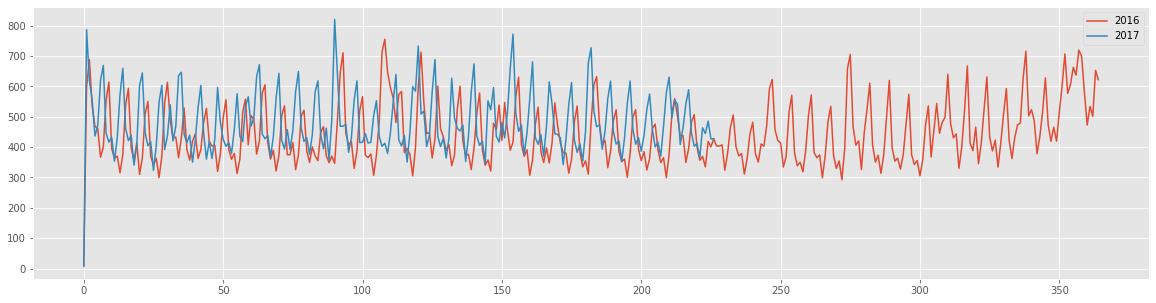

In [59]:
plt.figure(figsize=(20, 5))
plt.plot(sales_plot.loc['2016']['sales'].values, label='2016')
plt.plot(sales_plot.loc['2017']['sales'].values, label='2017')
plt.legend()
plt.show()

In [60]:
sales_plot

,sales
date,
2013-01-01,1.409438
2013-01-02,278.390807
2013-01-03,202.840197
2013-01-04,198.911154
2013-01-05,267.873244
...,...
2017-08-11,463.733851
2017-08-12,444.798280
2017-08-13,485.768618


In [61]:
b_days = sales_plot.copy()
b_days['dow'] = b_days.index.day_of_week

In [62]:
b_days

,sales,dow
date,,
2013-01-01,1.409438,1
2013-01-02,278.390807,2
2013-01-03,202.840197,3
2013-01-04,198.911154,4
2013-01-05,267.873244,5
...,...,...
2017-08-11,463.733851,4
2017-08-12,444.798280,5
2017-08-13,485.768618,6


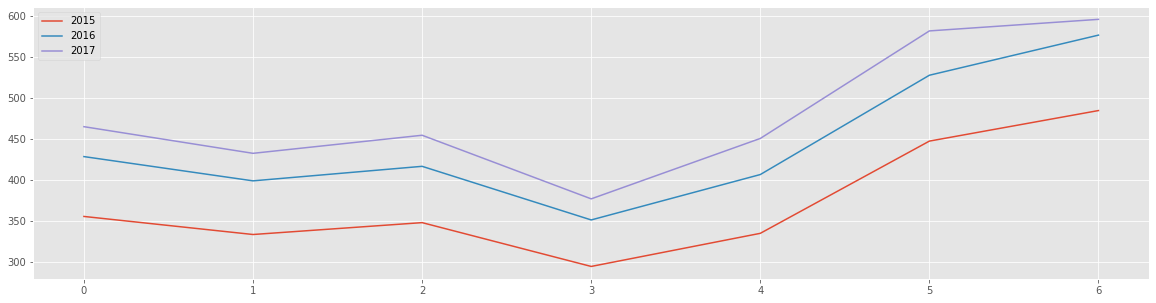

In [63]:
plt.figure(figsize=(20,5))
plt.plot(b_days.loc['2015'].groupby('dow')['sales'].mean().values, label='2015')
plt.plot(b_days.loc['2016'].groupby('dow')['sales'].mean().values, label='2016')
plt.plot(b_days.loc['2017'].groupby('dow')['sales'].mean().values, label='2017')
plt.legend()
plt.show()

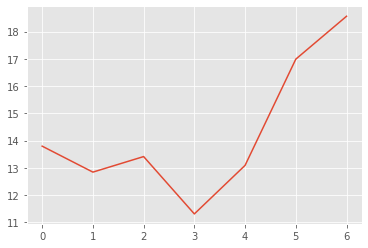

In [64]:
percent_days = b_days.loc['2016'].groupby('dow')['sales'].mean()
percent_days = percent_days.map(lambda x: x*100 / percent_days.sum())
plt.plot(percent_days)
plt.show()

In [65]:
percent_days

dow
0    13.795066
1    12.842845
2    13.413020
3    11.309089
4    13.090443
5    16.987701
6    18.561837
Name: sales, dtype: float64

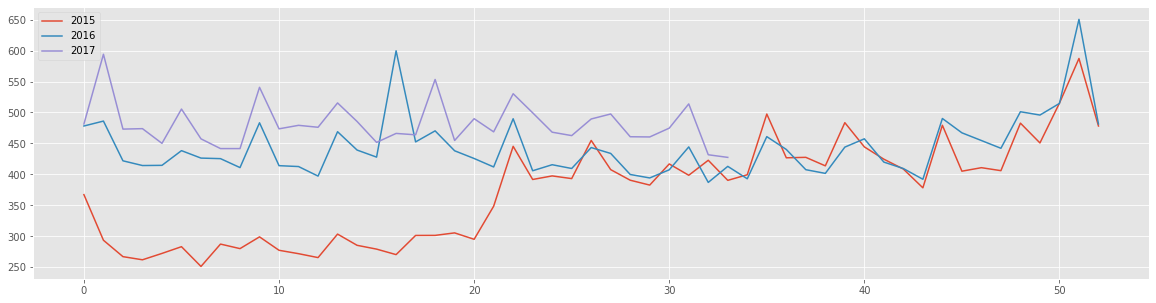

In [66]:
week = sales_plot.resample('w').mean()
plt.figure(figsize=(20, 5))
plt.plot(week.loc['2015']['sales'].values, label='2015')
plt.plot(week.loc['2016']['sales'].values, label='2016')
plt.plot(week.loc['2017']['sales'].values, label='2017')
plt.legend()
plt.show()

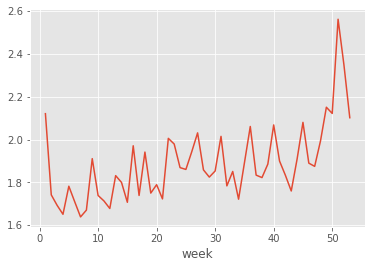

In [67]:
week['week'] = week.index.week
percent_weeks = week.loc['2015':].groupby('week')['sales'].mean()
percent_weeks = percent_weeks.map(lambda x: x*100 / percent_weeks.sum())
percent_weeks.plot()
plt.show()

In [68]:
percent_weeks.head()

week
1    2.121150
2    1.742033
3    1.693115
4    1.651310
5    1.782369
Name: sales, dtype: float64

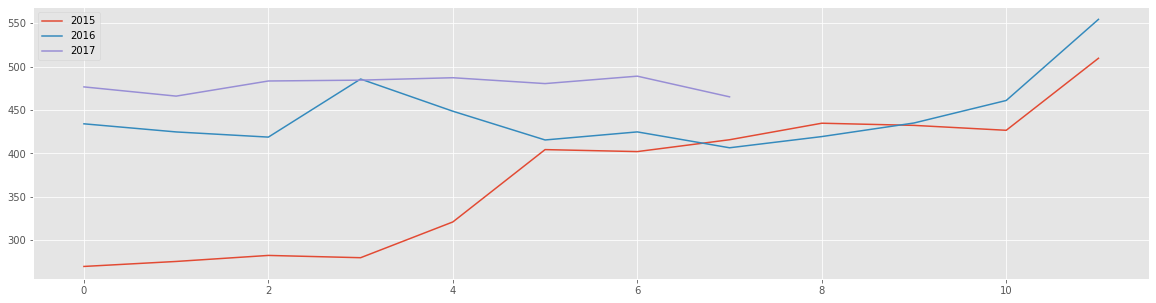

In [69]:
month = sales_plot.resample('m').mean()
plt.figure(figsize=(20, 5))
plt.plot(month.loc['2015']['sales'].values, label='2015')
plt.plot(month.loc['2016']['sales'].values, label='2016')
plt.plot(month.loc['2017']['sales'].values, label='2017')
plt.legend()
plt.show()

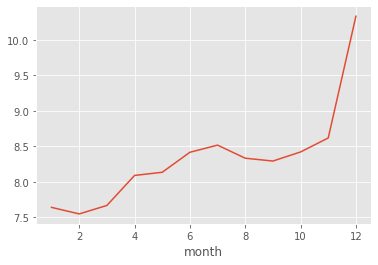

In [70]:
month['month'] = month.index.month
percent_month = month.loc['2015':].groupby('month')['sales'].mean()
percent_month = percent_month.map(lambda x: x*100 / percent_month.sum())
percent_month.plot()
plt.show()

In [71]:
percent_month

month
1      7.639615
2      7.547537
3      7.666741
4      8.089257
5      8.133914
6      8.415426
7      8.516126
8      8.331923
9      8.291944
10     8.419957
11     8.616890
12    10.330671
Name: sales, dtype: float64

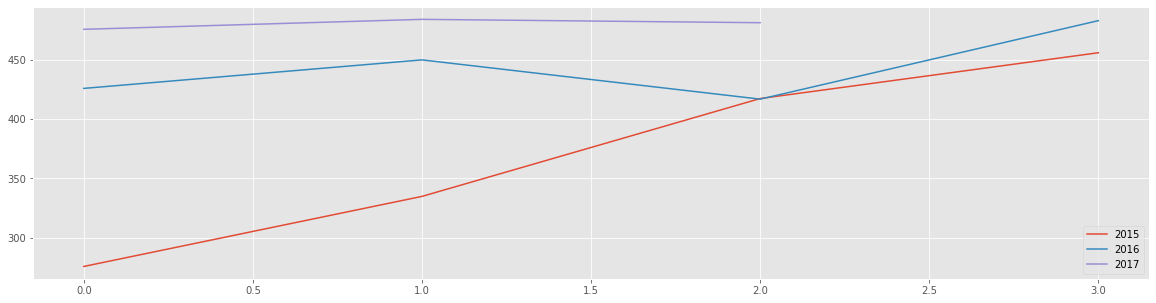

In [72]:
quarter = sales_plot.resample('q').mean()
plt.figure(figsize=(20, 5))
plt.plot(quarter.loc['2015']['sales'].values, label='2015')
plt.plot(quarter.loc['2016']['sales'].values, label='2016')
plt.plot(quarter.loc['2017']['sales'].values, label='2017')
plt.legend()
plt.show()

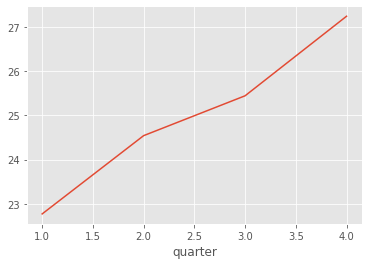

In [73]:
quarter['quarter'] = quarter.index.quarter
percent_quarter = quarter.loc['2015':].groupby('quarter')['sales'].mean()
percent_quarter = percent_quarter.map(lambda x: x*100 / percent_quarter.sum())
percent_quarter.plot()
plt.show()

In [74]:
percent_quarter

quarter
1    22.773899
2    24.542468
3    25.443086
4    27.240548
Name: sales, dtype: float64

# 2. Holidays adfsdfsadfdsf

In [75]:
holiday.head()

,type,locale,locale_name,description,transferred
date,,,,,
2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [76]:
holiday['type'].value_counts()

Holiday       221
Event          56
Additional     51
Transfer       12
Bridge          5
Work Day        5
Name: type, dtype: int64

In [77]:
holiday['locale'].value_counts()

National    174
Local       152
Regional     24
Name: locale, dtype: int64

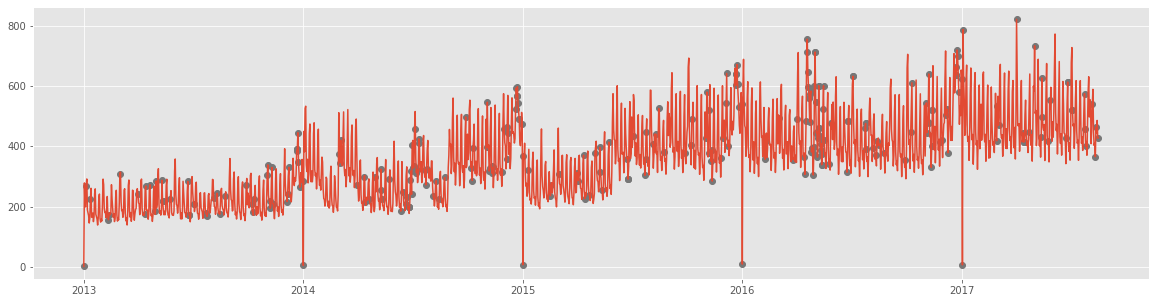

In [78]:
holidays = holiday.loc[holiday.index.isin(sales_plot.index)]
plt.figure(figsize=(20,5))
plt.plot_date(holidays.index, sales_plot.loc[holidays.index], color='C3')
plt.plot(sales_plot)
plt.show()

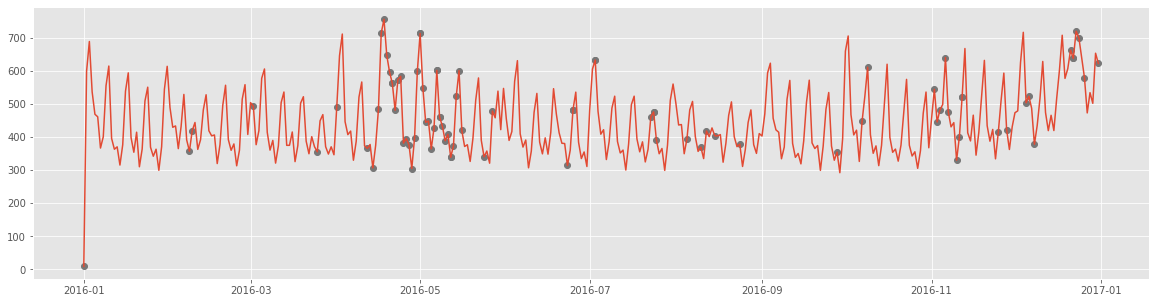

In [79]:
plt.figure(figsize=(20,5))
plt.plot_date(holidays.loc['2016'].index, sales_plot.loc[holidays.loc['2016'].index], color='C3')
plt.plot(sales_plot.loc['2016'])
plt.show()